In [8]:
# Benchmarking PBMC dataset with simulated CNVs
# - CD14 monocytes: Chr6 loss, Chr22 loss
# - CD4 T cells: ChrX gain

adfile_path = "/Users/pythonpete/Downloads/CSCB-2025-Final/hesc_annotated_unnormalized.h5ad"

In [9]:
from cscb_methods import *

In [10]:
# Read file
adata = sc.read_h5ad(adfile_path)

In [11]:
#adata.var["start"] = np.NAN
#adata.var["end"] = np.NAN
#adata.var["chromosome"] = np.NAN
adata.var.columns = ["gene_ids"] + list(adata.var.columns[1:])
adata.var

,gene_ids
RP11-34P13.3,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC233755.2,ENSG00000277856
AC233755.1,ENSG00000275063
AC240274.1,ENSG00000271254
AC213203.1,ENSG00000277475


In [12]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype
AAACCTGAGAATTGTG-1,2488,11469.0,401.0,3.496382,5000.0,43.595779,2488,11469.0,1,iPSC
AAACCTGAGACAATAC-1,3559,16891.0,669.0,3.960689,6438.0,38.114975,3559,16891.0,0,iPSC
AAACCTGAGACTACAA-1,2629,9423.0,377.0,4.000849,3390.0,35.975803,2629,9423.0,0,iPSC
AAACCTGAGACTTTCG-1,5118,32728.0,1597.0,4.879614,12402.0,37.894157,5118,32728.0,1,iPSC
AAACCTGAGGCGTACA-1,2515,10700.0,476.0,4.448598,4417.0,41.280373,2515,10700.0,1,iPSC
...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCAAC-1,3500,19690.0,807.0,4.098527,9161.0,46.526154,3500,19690.0,1,iPSC
TTTGTCATCCACTCCA-1,2404,9304.0,433.0,4.653913,3774.0,40.563198,2404,9304.0,0,iPSC
TTTGTCATCTCTTGAT-1,3441,16482.0,596.0,3.616066,6164.0,37.398373,3441,16482.0,0,iPSC
TTTGTCATCTGTTTGT-1,3065,15306.0,624.0,4.076833,6725.0,43.937019,3065,15306.0,1,iPSC


In [13]:
ref = "/Users/pythonpete/Downloads/PBMC_simulated_cnas_041025.h5ad"
ref_ad = sc.read_h5ad(ref)
ref_ad

AnnData object with n_obs × n_vars = 10309 × 20104
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'cell_type', 'simulated_cnvs'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'chromosome', 'start', 'end', 'strand'
    layers: 'counts'

In [14]:
ref_ad.obs["simulated_cnvs"].astype(bool).sum()

3997

In [15]:
merge_gene_positions(adata, ref_ad)
adata.var

,gene_ids,chromosome,start,end,strand
0,ENSG00000243485,NaN,NaN,NaN,NaN
1,ENSG00000237613,NaN,NaN,NaN,NaN
2,ENSG00000186092,NaN,NaN,NaN,NaN
3,ENSG00000238009,NaN,NaN,NaN,NaN
4,ENSG00000239945,1,89551.0,91105.0,-1.0
...,...,...,...,...,...
33689,ENSG00000277856,NaN,NaN,NaN,NaN
33690,ENSG00000275063,NaN,NaN,NaN,NaN
33691,ENSG00000271254,HG1343_HG173_HG459_PATCH,1011165.0,1078120.0,1.0
33692,ENSG00000277475,NaN,NaN,NaN,NaN


In [16]:
# Ensure that chromosomes are of the form 'chr#' and exclude any other chromosomes
adata = standardize_chromosomes(adata)

In [17]:
# Run if needed:
# adata = qc(adata)
# adata = downsample(adata,n_cells=2000)

In [18]:
# Normalize, do not log transform before CopyKAT GMM clustering
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)

In [19]:
# CopyKAT GMM clustering for automatic detection of diploid reference/normal cells vs aneuploid cells
diploid_pred,labels=identify_diploid_cells_high_precision(adata,window=10,n_components=3,primary_trim_percentile=100,secondary_trim_percentile=10)

adata.obs['predicted_diploid'] = diploid_pred
adata.obs['gmm_cluster'] = labels.astype(str)

In [20]:
# Log transform, find HVGs for UMAP plots
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.125, max_mean=6, min_disp=0.25)

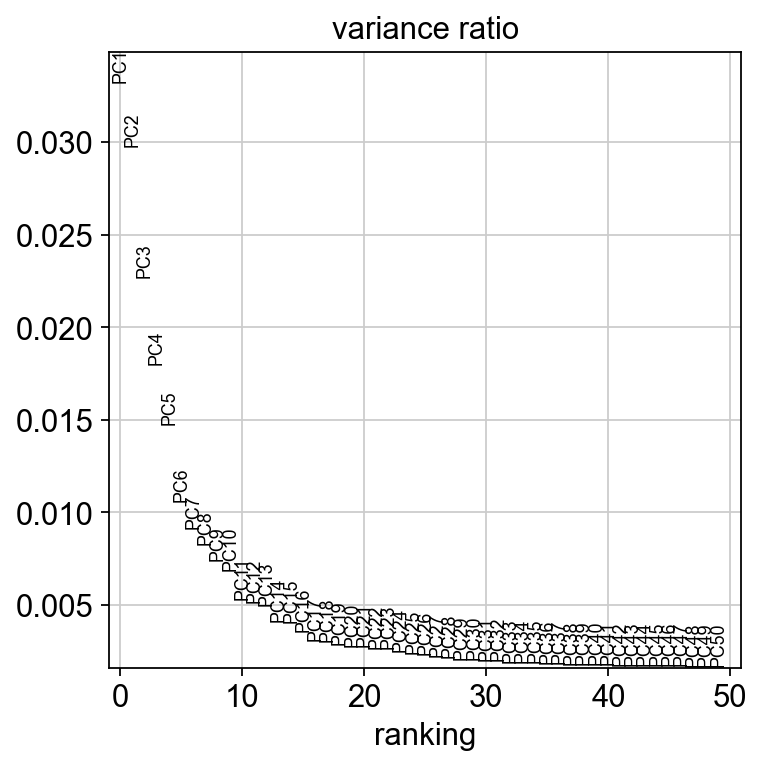

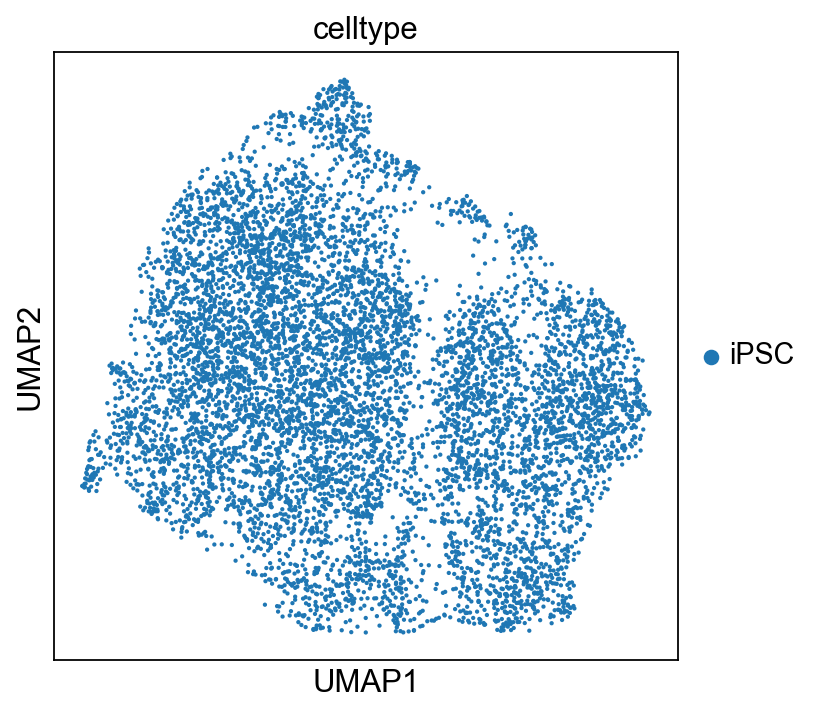

In [21]:
# PCA and KNN for UMAP plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pl.pca_variance_ratio(adata,50)

sc.pp.neighbors(adata,n_neighbors=20,n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype')

In [22]:
# Quick run of InferCNVpy for Leiden clustering by CNV score
reference_key = 'predicted_diploid'
reference_cat = ['diploid']

cnv.tl.infercnv(adata,reference_key=reference_key,reference_cat=reference_cat,
                exclude_chromosomes=None,chunksize=5000,calculate_gene_values=False,
                window_size=100,step=10,dynamic_threshold=1.5)

  0%|          | 0/2 [00:00<?, ?it/s]

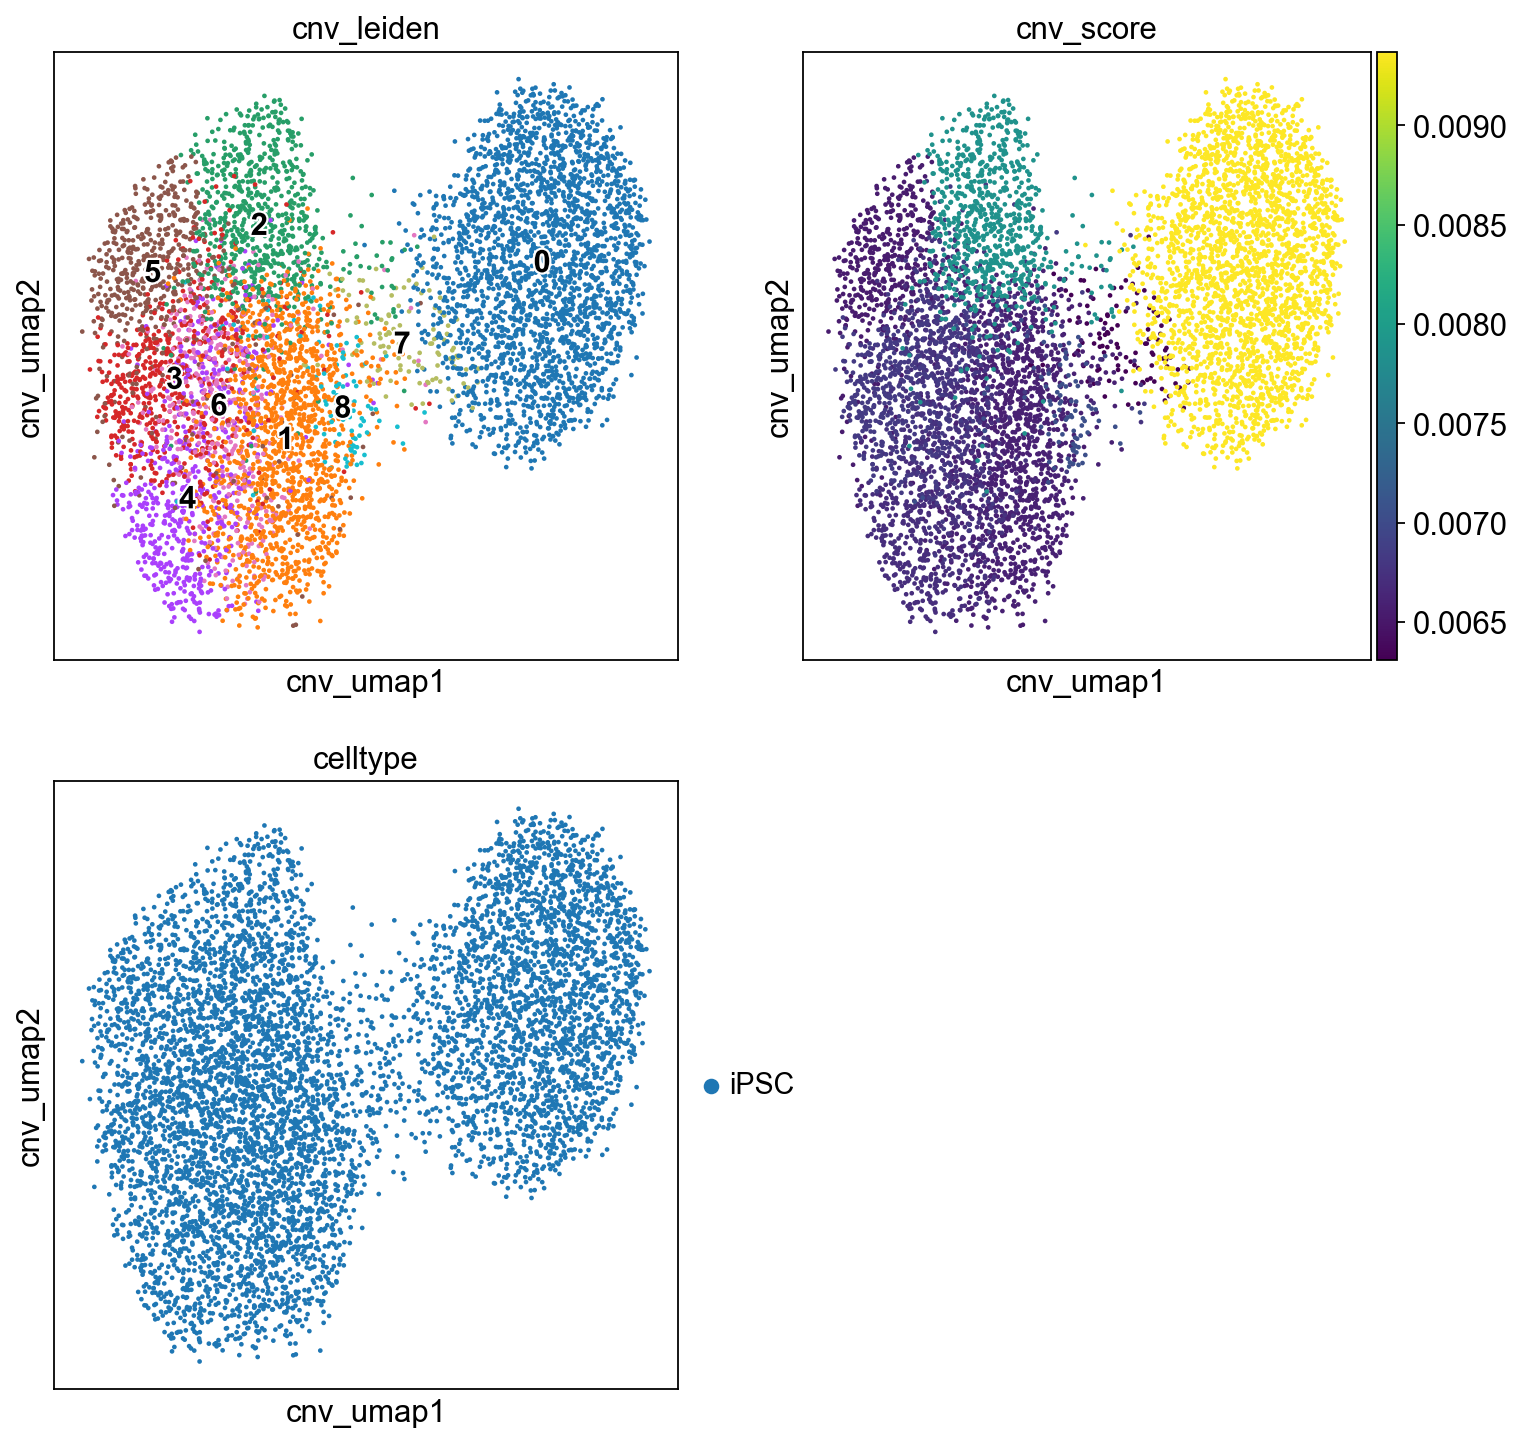

In [23]:
# Plot
plot_aneuploid_cnv_clusters(adata,diploid_annotation='predicted_diploid')

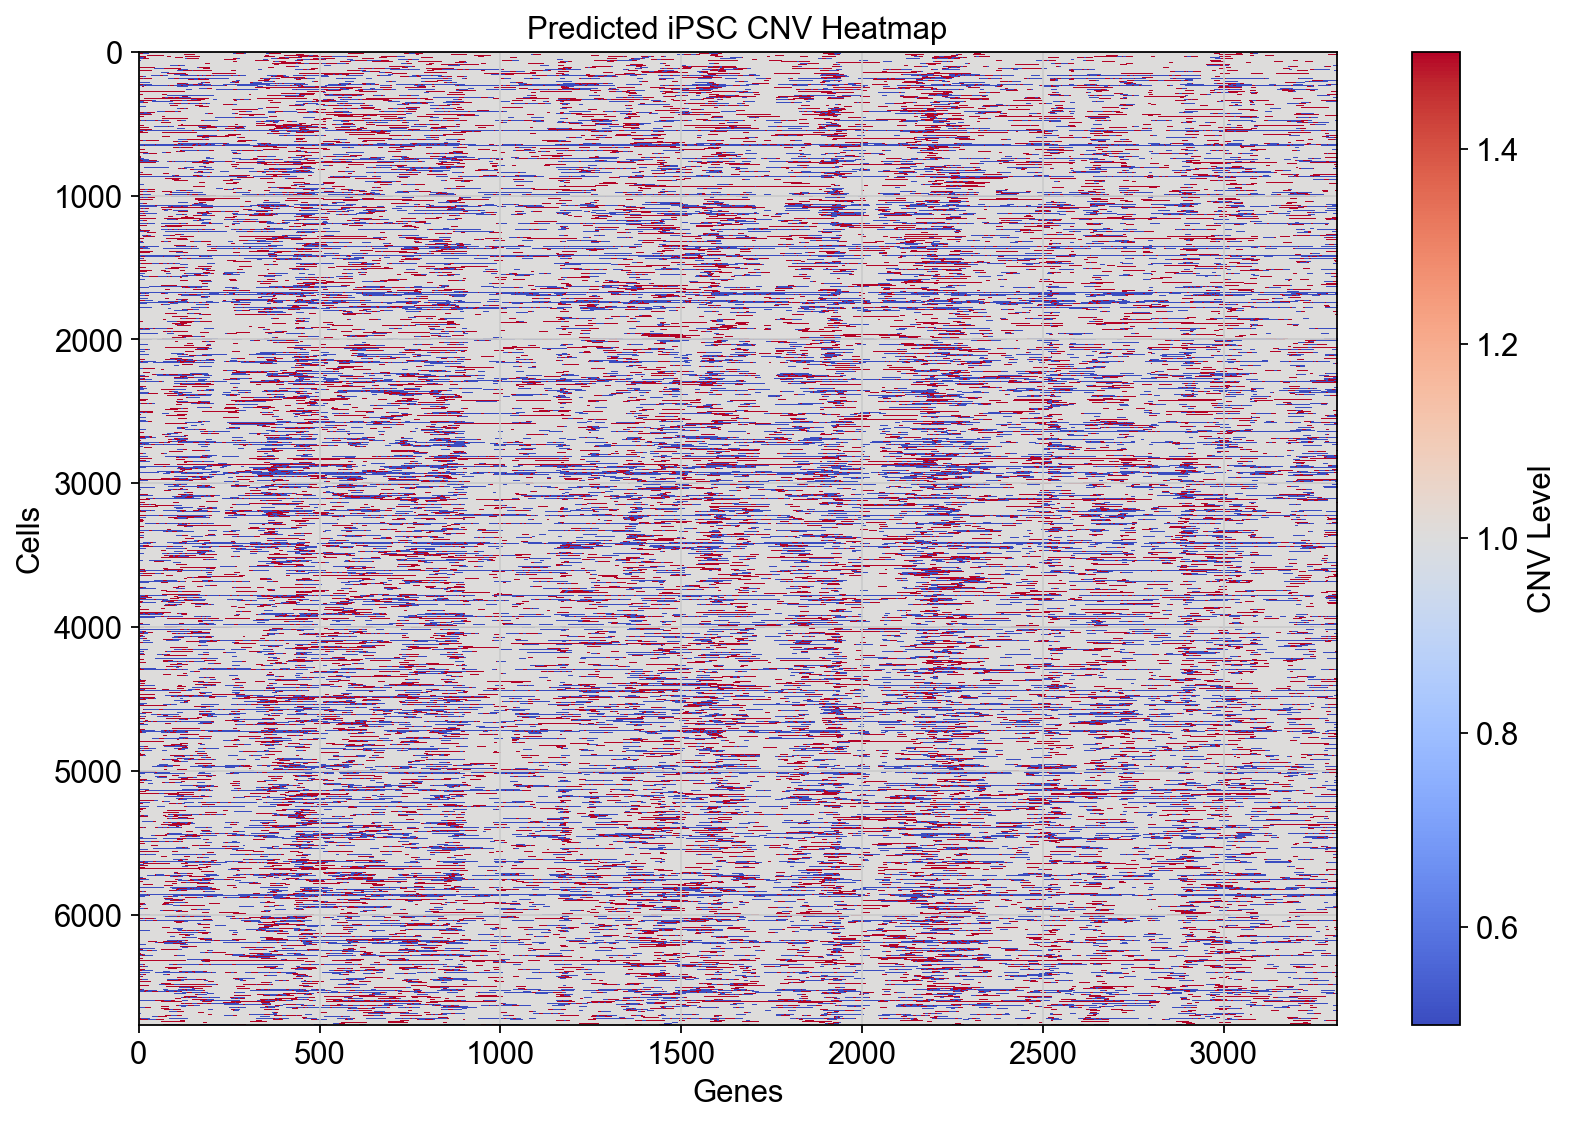

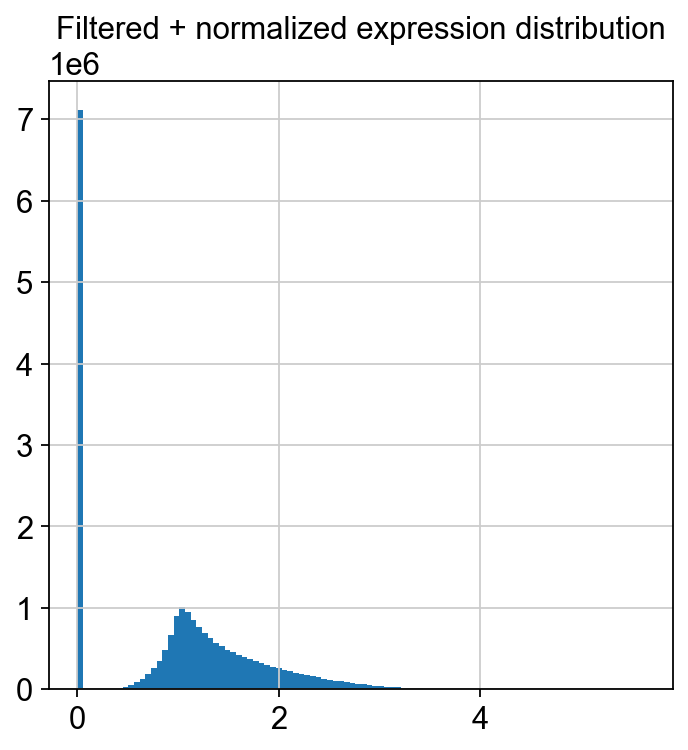

In [24]:
adata_ipsc = i3_hmm_infercnv(adata,cell_type='iPSC',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [25]:
adata_ipsc.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
AAACCTGAGAATTGTG-1,2488,11469.0,401.0,3.496382,5000.0,43.595779,2488,11469.0,1,iPSC,aneuploid,1,0.758074,chr1:944203.0-63593721.0 (loss)
AAACCTGAGACAATAC-1,3559,16891.0,669.0,3.960689,6438.0,38.114975,3559,16891.0,0,iPSC,aneuploid,2,1.003018,
AAACCTGAGACTTTCG-1,5118,32728.0,1597.0,4.879614,12402.0,37.894157,5118,32728.0,1,iPSC,aneuploid,1,1.101117,chr1:944203.0-111449256.0 (gain)
AAACCTGAGGCGTACA-1,2515,10700.0,476.0,4.448598,4417.0,41.280373,2515,10700.0,1,iPSC,aneuploid,1,0.758980,chr1:944203.0-37514766.0 (loss)
AAACCTGCACTGAAGG-1,3695,17886.0,599.0,3.348988,6263.0,35.016216,3695,17886.0,0,iPSC,aneuploid,2,1.010866,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCACAGGCC-1,3551,17623.0,699.0,3.966408,6534.0,37.076550,3551,17623.0,0,iPSC,aneuploid,2,0.990190,
TTTGTCATCATGCAAC-1,3500,19690.0,807.0,4.098527,9161.0,46.526154,3500,19690.0,1,iPSC,aneuploid,1,0.948838,chr1:84479259.0-156741590.0 (loss)
TTTGTCATCTCTTGAT-1,3441,16482.0,596.0,3.616066,6164.0,37.398373,3441,16482.0,0,iPSC,aneuploid,2,0.973136,
TTTGTCATCTGTTTGT-1,3065,15306.0,624.0,4.076833,6725.0,43.937019,3065,15306.0,1,iPSC,aneuploid,1,0.879414,chr3:49674014.0-155944020.0 (loss)


In [26]:
# Update new CNV information back into original adata
adata.obs.loc[adata_ipsc.obs_names,'hmm_cnv'] = adata_ipsc.obs['hmm_cnv']
adata.obs['hmm_cnv'].fillna('', inplace=True)
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv
AAACCTGAGAATTGTG-1,2488,11469.0,401.0,3.496382,5000.0,43.595779,2488,11469.0,1,iPSC,aneuploid,1,chr1:944203.0-63593721.0 (loss)
AAACCTGAGACAATAC-1,3559,16891.0,669.0,3.960689,6438.0,38.114975,3559,16891.0,0,iPSC,aneuploid,2,
AAACCTGAGACTACAA-1,2629,9423.0,377.0,4.000849,3390.0,35.975803,2629,9423.0,0,iPSC,diploid,0,
AAACCTGAGACTTTCG-1,5118,32728.0,1597.0,4.879614,12402.0,37.894157,5118,32728.0,1,iPSC,aneuploid,1,chr1:944203.0-111449256.0 (gain)
AAACCTGAGGCGTACA-1,2515,10700.0,476.0,4.448598,4417.0,41.280373,2515,10700.0,1,iPSC,aneuploid,1,chr1:944203.0-37514766.0 (loss)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGCAAC-1,3500,19690.0,807.0,4.098527,9161.0,46.526154,3500,19690.0,1,iPSC,aneuploid,1,chr1:84479259.0-156741590.0 (loss)
TTTGTCATCCACTCCA-1,2404,9304.0,433.0,4.653913,3774.0,40.563198,2404,9304.0,0,iPSC,diploid,0,
TTTGTCATCTCTTGAT-1,3441,16482.0,596.0,3.616066,6164.0,37.398373,3441,16482.0,0,iPSC,aneuploid,2,
TTTGTCATCTGTTTGT-1,3065,15306.0,624.0,4.076833,6725.0,43.937019,3065,15306.0,1,iPSC,aneuploid,1,chr3:49674014.0-155944020.0 (loss)


In [27]:
adata.obs["hmm_cnv"].astype(bool).sum()

3187

In [28]:
# Get top 10 most common CNVs
top_cnvs = adata.obs['hmm_cnv'].value_counts().head(10)
print("Top 10 most common CNVs:\n")
print(top_cnvs)

print("\nFraction of iPSC vs HSPC cells for each top CNV:\n")

# For each CNV, calculate fraction of iPSC and HSPC cells
for cnv in top_cnvs.index:
    subset = adata.obs[adata.obs['hmm_cnv'] == cnv]
    total = len(subset)

    ipsc_count = (subset['celltype'] == 'iPSC').sum()

    ipsc_frac = ipsc_count / total if total else 0

    print(f"{cnv}:")
    print(f"  iPSC: {ipsc_count} cells ({ipsc_frac:.2%})")


Top 10 most common CNVs:

hmm_cnv
                                   4919
chr1:944203.0-32818031.0 (loss)      20
chr1:944203.0-28246906.0 (loss)      20
chr1:944203.0-29181900.0 (loss)      18
chr1:944203.0-35193446.0 (loss)      18
chr1:944203.0-31434680.0 (loss)      16
chr1:944203.0-32650903.0 (loss)      16
chr1:944203.0-32333635.0 (loss)      16
chr1:944203.0-32205453.0 (loss)      16
chr1:944203.0-28648291.0 (loss)      15
Name: count, dtype: int64

Fraction of iPSC vs HSPC cells for each top CNV:

:
  iPSC: 4919 cells (100.00%)
chr1:944203.0-32818031.0 (loss):
  iPSC: 20 cells (100.00%)
chr1:944203.0-28246906.0 (loss):
  iPSC: 20 cells (100.00%)
chr1:944203.0-29181900.0 (loss):
  iPSC: 18 cells (100.00%)
chr1:944203.0-35193446.0 (loss):
  iPSC: 18 cells (100.00%)
chr1:944203.0-31434680.0 (loss):
  iPSC: 16 cells (100.00%)
chr1:944203.0-32650903.0 (loss):
  iPSC: 16 cells (100.00%)
chr1:944203.0-32333635.0 (loss):
  iPSC: 16 cells (100.00%)
chr1:944203.0-32205453.0 (loss):
  iPS

In [ ]:
adata.var

In [ ]:
adata.var.loc[adata.var["start"]==944203.0, :]

In [ ]:
# Because chromosome location and genomic regions are almost all wrong
# We will focus on whether we were able to detect in a cell a CNV and its type (gain or loss) correctly
assess_predicted_cnvs(adata,prediction_annotation='hmm_cnv',truth_annotation='simulated_cnvs')